<h2> Lab 7

In [80]:
import warnings
warnings.filterwarnings("ignore")
#Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Basic sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional, Input
from keras.layers import RepeatVector, TimeDistributed
from keras.optimizers import Adam, RMSprop
from keras.regularizers import L1L2
from keras.callbacks import ModelCheckpoint
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
#encode elements and colors into integers for plotting/analysis
elements={0:'Ag', 1:'In', 2:'U', 3:'W'}
colors={0:'b', 1:'g', 2:'r', 3:'m'}
num_classes=len(elements)
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13476466674585247405
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15502344192
locality {
  bus_id: 4
  numa_node: 3
  links {
  }
}
incarnation: 14974514861080241082
physical_device_desc: "device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:d8:00.0, compute capability: 7.0"
xla_global_id: 416903419
]


2024-10-16 15:12:05.089588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /device:GPU:0 with 14784 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:d8:00.0, compute capability: 7.0


<h3> Exercise Set 1

<h3> Exercise Set 2

In [36]:
# Exercise Set 2 (a)
url='https://raw.githubusercontent.com/aims-umich/ners590data/main/nrta.csv'
data = pd.read_csv(url)
print(data.head(5))

t = data.values[0,1:401]
print("t has len", len(t))
data = data.drop(0, axis=0)
data.shape

  label    t1    t2    t3    t4    t5    t6    t7     t8     t9  ...     t391  \
0     0  0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.750  4.250  ...  195.250   
1    Ag  0.00  0.00  0.00  0.00  0.00  0.00  6.00  0.857  0.818  ...    0.828   
2    Ag  0.00  0.00  0.00  0.00  0.00  0.00  1.00  1.000  0.900  ...    0.965   
3    Ag  0.00  0.00  0.00  0.00  1.00  0.00  2.50  2.000  0.692  ...    1.011   
4    Ag  0.00  0.00  0.00  0.00  0.00  0.00  1.00  1.600  1.333  ...    0.930   

      t392     t393     t394     t395     t396     t397     t398     t399  \
0  195.750  196.250  196.750  197.250  197.750  198.250  198.750  199.250   
1    1.000    1.197    1.125    0.908    1.014    0.986    1.191    0.950   
2    1.198    0.911    0.860    0.900    1.024    1.233    0.879    1.120   
3    1.000    1.174    0.747    0.833    0.902    1.099    1.305    0.776   
4    0.709    1.026    0.929    1.366    1.029    1.095    1.030    0.914   

      t400  
0  199.750  
1    1.216  
2    0.929 

(10000, 401)

In [44]:
# Exercise Set 2 (b)
data = data.sample(frac=1).reset_index(drop=True)

Yraw = data.loc[:,'label']
Xraw = data.iloc[:,1:]

In [53]:
# Exercise Set 2 (c)
Y = pd.get_dummies(Yraw)

In [56]:
# Exercise Set 2 (d)
X = np.reshape(Xraw, (10000,400,1))

In [58]:
# Exercise Set 2 (e)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)

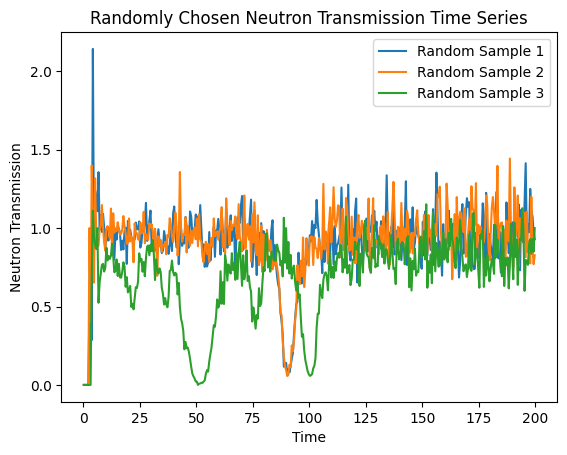

In [82]:
# Exercise Set 2 (f)
x = []
legend = ['Random Sample 1', 'Random Sample 2', 'Random Sample 3']
for i in range(3):
    x.append(Xtrain[np.random.randint(Xtrain.shape[0]),:,0])
plt.plot(t, np.column_stack(x), label=legend)
plt.xlabel('Time')
plt.ylabel('Neutron Transmission')
plt.title('Randomly Chosen Neutron Transmission Time Series')
plt.legend()
plt.show()

<h2> Exercise Set 3

In [94]:
# Exercise Set 3 (a)
  # node per layer, Y.shape[1] is number of categories
n_nodes=[100,50,32,Y.shape[1]]
lstm = Sequential()

lstm.add(Input(shape=Xtrain.shape[1:]))
lstm.add(LSTM(n_nodes[0], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True))
lstm.add(LSTM(n_nodes[1], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=False))
lstm.add(Dense(n_nodes[2], activation='relu'))
lstm.add(Dense(n_nodes[3], activation='softmax'))
lstm.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 400, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,764 (284.23 KB)

 Trainable params: 72,764 (284.23 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Exercise Set 3 (b)
gru = Sequential()

gru.add(Input(shape=Xtrain.shape[1:]))
gru.add(GRU(n_nodes[0], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True))
gru.add(GRU(n_nodes[1], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=False))
gru.add(Dense(n_nodes[2], activation='relu'))
gru.add(Dense(n_nodes[3], activation='softmax'))
gru.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 400, 100)       │        30,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        22,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,464 (216.66 KB)

 Trainable params: 55,464 (216.66 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
# Exercise Set 3 (c)
bilstm = Sequential()

bilstm.add(Input(shape=Xtrain.shape[1:]))
bilstm.add(Bidirectional(LSTM(n_nodes[0], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=True)))
bilstm.add(Bidirectional(LSTM(n_nodes[1], kernel_initializer = 'normal', recurrent_regularizer=L1L2(0.01,0.01), return_sequences=False)))
bilstm.add(Dense(n_nodes[2], activation='relu'))
bilstm.add(Dense(n_nodes[3], activation='softmax'))
bilstm.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 400, 200)       │        81,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,364 (724.08 KB)

 Trainable params: 185,364 (724.08 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# Exercise Set 3 (d)
lstm.compile(loss='categorical_crossentropy', optimizer=Adam(6e-4), metrics=['accuracy'])
gru.compile(loss='categorical_crossentropy', optimizer=Adam(6e-4), metrics=['accuracy'])
bilstm.compile(loss='categorical_crossentropy', optimizer=Adam(6e-4), metrics=['accuracy'])

In [108]:
# Exercise Set 3 (e)
lstm_checkpoint = ModelCheckpoint('lstm_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
gru_checkpoint = ModelCheckpoint('gru_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
bilstm_checkpoint = ModelCheckpoint('bilstm_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

In [109]:
# Exercise Set 3 (f)
lstm_history = lstm.fit(Xtrain, Ytrain, epochs=15, batch_size=64, validation_split = 0.15, callbacks=lstm_checkpoint, verbose=True)
gru_history = gru.fit(Xtrain, Ytrain, epochs=15, batch_size=64, validation_split = 0.15, callbacks=gru_checkpoint, verbose=True)
bilstm_history = bilstm.fit(Xtrain, Ytrain, epochs=15, batch_size=64, validation_split = 0.15, callbacks=bilstm_checkpoint, verbose=True)

Epoch 1/15


2024-10-16 16:30:31.006617: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2589 - loss: 18.0916
Epoch 1: val_accuracy improved from -inf to 0.27200, saving model to lstm_best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.2590 - loss: 18.0427 - val_accuracy: 0.2720 - val_loss: 5.6050
Epoch 2/15
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3693 - loss: 4.1213
Epoch 2: val_accuracy improved from 0.27200 to 0.37867, saving model to lstm_best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3695 - loss: 4.1030 - val_accuracy: 0.3787 - val_loss: 2.0528
Epoch 3/15
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5179 - loss: 1.7273
Epoch 3: val_accuracy improved from 0.37867 to 0.50044, saving model to lstm_best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5181 - loss: 1.7233 - val_accuracy: 0.5004 - val_loss: 1.4575
Epoch 4/15
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5438 - loss: 1.2847
Epoch 4: val_accuracy impro

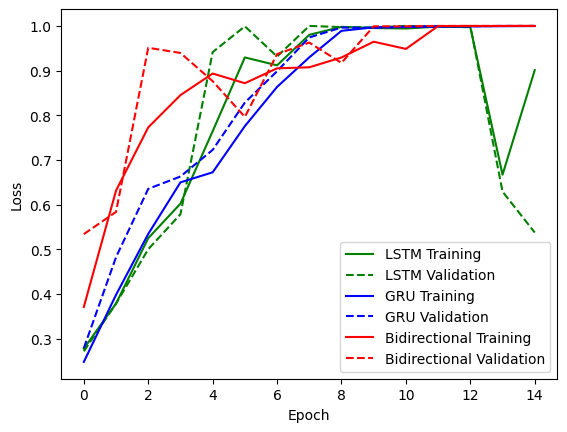

In [110]:
# Exercise Set 3 (g)
plt.figure()

train_err = lstm_history.history['accuracy']
val_err = lstm_history.history['val_accuracy']
plt.plot(train_err, label='LSTM Training', color='g')
plt.plot(val_err, label='LSTM Validation', color='g', linestyle='dashed')

train_err = gru_history.history['accuracy']
val_err = gru_history.history['val_accuracy']
plt.plot(train_err, label='GRU Training', color='b')
plt.plot(val_err, label='GRU Validation', color='b', linestyle='dashed')

train_err = bilstm_history.history['accuracy']
val_err = bilstm_history.history['val_accuracy']
plt.plot(train_err, label='Bidirectional Training', color='r')
plt.plot(val_err, label='Bidirectional Validation', color='r', linestyle='dashed')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

<h2> Exercise Set 3

In [111]:
lstm_best = load_model('lstm_best_model.keras')
gru = load_model('gru_best_model.keras')
bilstm_best = load_model('bilstm_best_model.keras')

In [ ]:
lstm_metrics = lstm_best.evaluate(Xtest, Ytest)
gru_metrics = gru_best.evaluate(Xtest, Ytest)
bilstm_metrics = bilstm_best.evaluate(Xtest, Ytest)
print(lstm_metrics)
